# Analysis of individual dog performace

## Data preparation

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv('races.csv')
df = df[df.team1.str.startswith('Wild')]
df = df.replace('unknown', np.nan)
df.shape

(1113, 20)

In [11]:
df_run1 = df[['name1', 'start_chng1', 'time1']]
df_run2 = df[['name2', 'start_chng2', 'time2']]
df_run3 = df[['name3', 'start_chng3', 'time3']]
df_run4 = df[['name4', 'start_chng4', 'time4']]

col_names = ['name', 'start_chng', 'time']
df_run1.columns = col_names
df_run2.columns = col_names
df_run3.columns = col_names
df_run4.columns = col_names

df_run1 = df_run1.dropna()
df_run2 = df_run2.dropna()
df_run3 = df_run3.dropna()
df_run4 = df_run4.dropna()

df_runs_234 = pd.concat([df_run2, df_run3, df_run4], axis=0)

df_runs_all = pd.concat([df_run1, df_run2, df_run3, df_run4], axis=0)
df_runs_all.shape

(4370, 3)

In [12]:
df_dogs = pd.DataFrame({
    'name': df_runs_all.name.unique(), 
    'runs': 0,
    'wrong_start': 0,
    'good_start': 0,
    'total_start': 0.0,
    'wrong_change': 0,
    'good_change': 0,
    'total_change': 0.0,
    'total_time': 0.0
})

df_dogs = df_dogs.set_index('name')
df_dogs.head()

,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time
name,,,,,,,,
Sunny,0,0,0,0.0,0,0,0.0,0.0
Brooke,0,0,0,0.0,0,0,0.0,0.0
Enola,0,0,0,0.0,0,0,0.0,0.0
Dusty,0,0,0,0.0,0,0,0.0,0.0
Jasper,0,0,0,0.0,0,0,0.0,0.0


In [13]:
for _, row in df_run1.iterrows():
    name, start, time = row
    df_dogs.loc[name, 'runs'] += 1
    df_dogs.loc[name, 'total_time'] += time

    if start < 0:
        df_dogs.loc[name, 'wrong_start'] += 1
    else:
        df_dogs.loc[name, 'good_start'] += 1
        df_dogs.loc[name, 'total_start'] += start

for _, row in df_runs_234.iterrows():
    name, change, time = row
    df_dogs.loc[name, 'runs'] += 1
    df_dogs.loc[name, 'total_time'] += time

    if change < 0:
        df_dogs.loc[name, 'wrong_change'] += 1
    else:
        df_dogs.loc[name, 'good_change'] += 1
        df_dogs.loc[name, 'total_change'] += change

df_dogs.head(10)

,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time
name,,,,,,,,
Sunny,117,19,98,10.533,0,0,0.00,477.26
Brooke,158,13,96,13.246,4,45,7.50,667.47
Enola,188,15,140,18.744,1,32,10.36,745.90
Dusty,44,0,2,1.350,3,39,20.53,279.87
Jasper,37,0,8,1.840,1,28,12.50,220.56
Falco,115,13,36,6.136,7,59,13.43,486.37
Negro,84,10,16,2.820,5,53,24.09,421.07
Sirius,98,0,2,1.140,6,90,83.81,404.92
Bailey,105,5,12,3.860,15,73,95.08,503.39


In [14]:
df_dogs.runs.sum()

4370

In [19]:
df_dogs = df_dogs[df_dogs['runs'] >= 10]                                   # I drop all dogs with less than 10 runs
df_dogs['wrong_start_ratio'] = df_dogs['wrong_start'] / df_dogs['runs'] * 100
df_dogs['wrong_change_ratio'] = df_dogs['wrong_change'] / df_dogs['runs'] * 100
df_dogs['avg_start'] = df_dogs['total_start'] / df_dogs['good_start']
df_dogs['avg_change'] = df_dogs['total_change'] / df_dogs['good_change']
df_dogs['avg_time'] = df_dogs['total_time'] / df_dogs['runs']
df_dogs.head(10)

,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time,wrong_start_ratio,wrong_change_ratio,avg_start,avg_change,avg_time
name,,,,,,,,,,,,,
Sunny,117,19,98,10.533,0,0,0.00,477.26,16.239316,0.000000,0.107480,NaN,4.079145
Brooke,158,13,96,13.246,4,45,7.50,667.47,8.227848,2.531646,0.137979,0.166667,4.224494
Enola,188,15,140,18.744,1,32,10.36,745.90,7.978723,0.531915,0.133886,0.323750,3.967553
Dusty,44,0,2,1.350,3,39,20.53,279.87,0.000000,6.818182,0.675000,0.526410,6.360682
Jasper,37,0,8,1.840,1,28,12.50,220.56,0.000000,2.702703,0.230000,0.446429,5.961081
Falco,115,13,36,6.136,7,59,13.43,486.37,11.304348,6.086957,0.170444,0.227627,4.229304
Negro,84,10,16,2.820,5,53,24.09,421.07,11.904762,5.952381,0.176250,0.454528,5.012738
Sirius,98,0,2,1.140,6,90,83.81,404.92,0.000000,6.122449,0.570000,0.931222,4.131837
Bailey,105,5,12,3.860,15,73,95.08,503.39,4.761905,14.285714,0.321667,1.302466,4.794190


# Number of races per dog

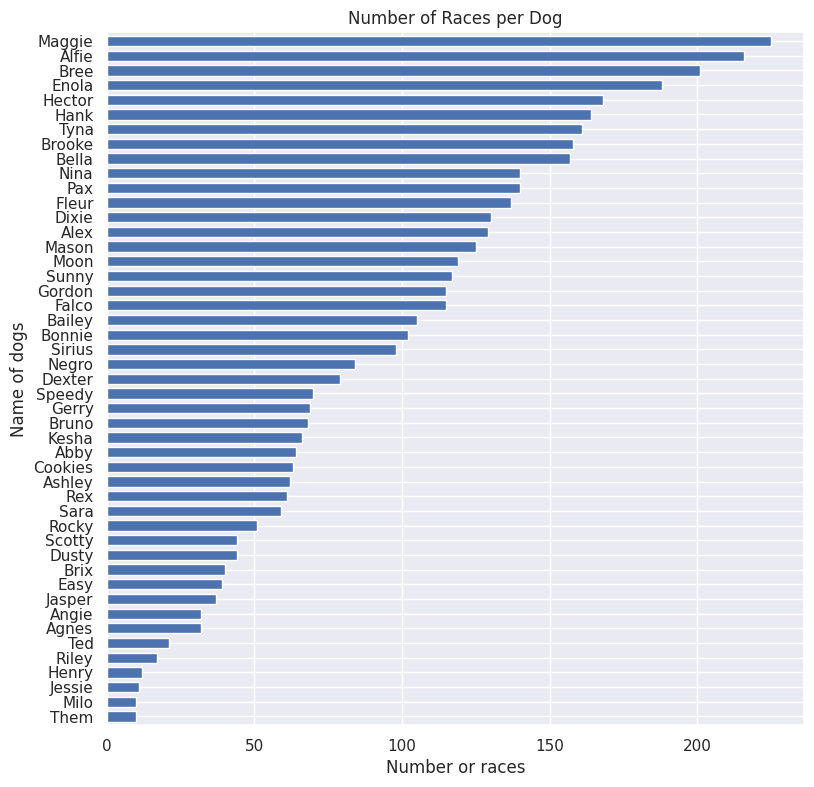

In [20]:
sns.set_theme(rc={"figure.figsize": (9,9)})
df_dogs['runs'].sort_values(ascending=True).plot.barh(width=0.7)
plt.xlabel('Number or races')
plt.ylabel('Name of dogs')
plt.title('Number of Races per Dog')
plt.show()

## Average run time per dog

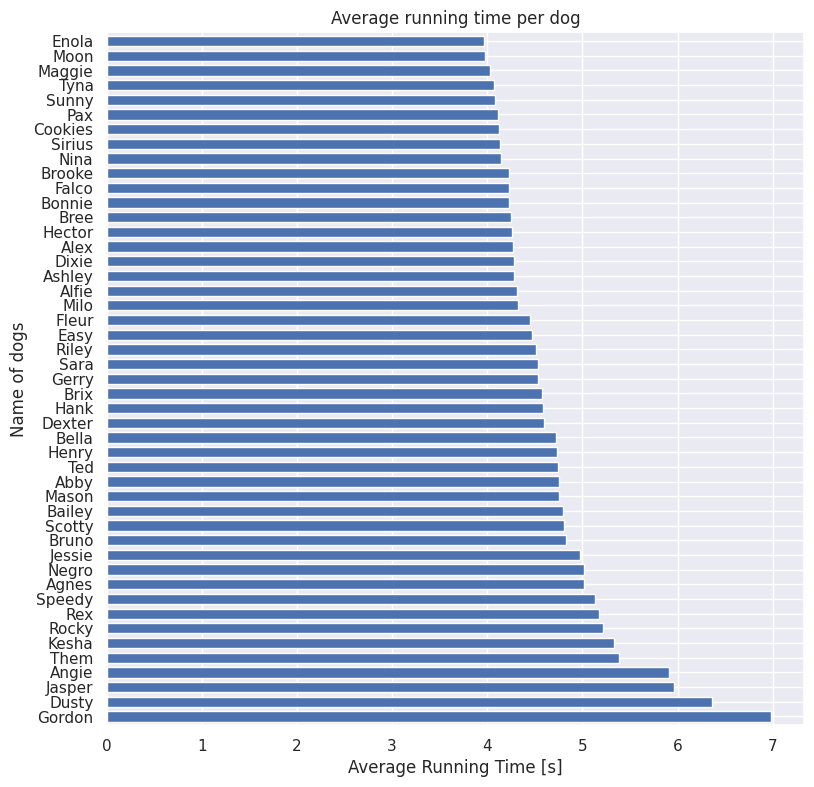

In [21]:
df_dogs['avg_time'].sort_values(ascending=False).plot.barh(width=0.7)
plt.xlabel('Average Running Time [s]')
plt.ylabel('Name of dogs')
plt.title('Average running time per dog')
plt.show()

## Ratio of wrong starts

Indicating dogs with at least one correct start

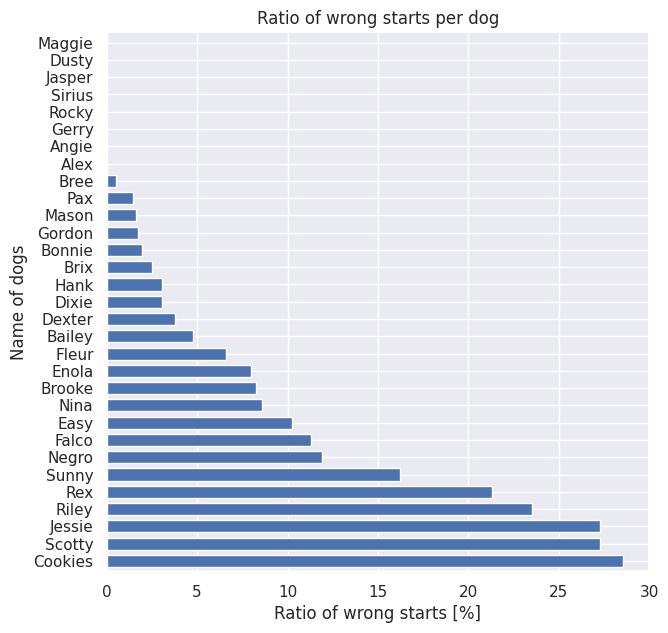

In [22]:
sns.set_theme(rc={"figure.figsize": (7,7)})
df_dogs[df_dogs.good_start > 0]['wrong_start_ratio'].sort_values(ascending=False).plot.barh(width=0.7)
plt.xlabel('Ratio of wrong starts [%]')
plt.ylabel('Name of dogs')
plt.title('Ratio of wrong starts per dog')
plt.show()

## Ratio of wrong changes

Indicating dogs with at least one correct change

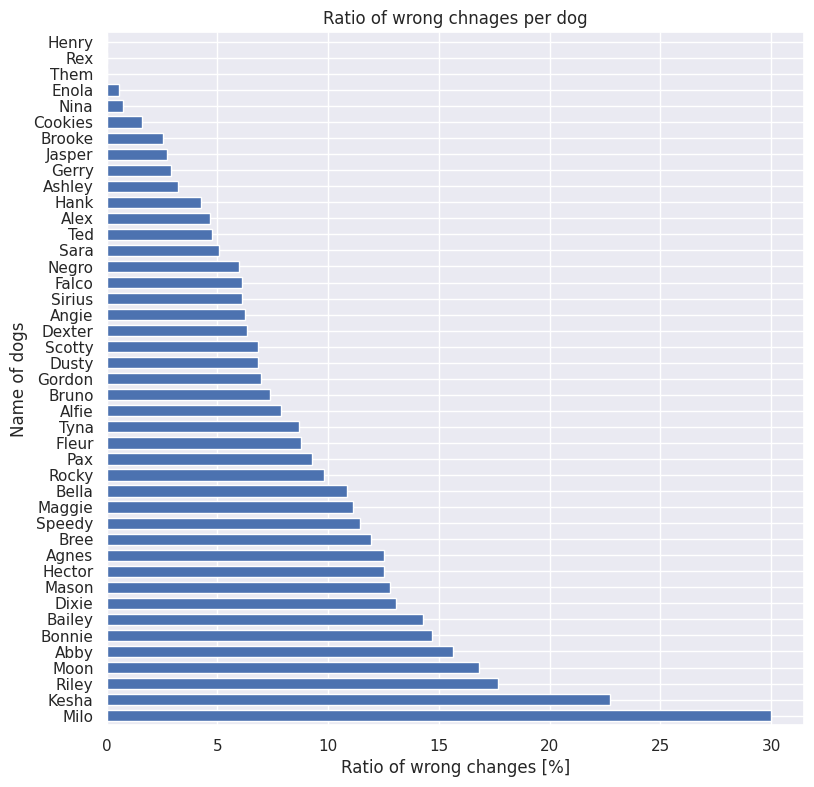

In [23]:
sns.set_theme(rc={"figure.figsize": (9, 9)})
df_dogs[df_dogs.good_change > 0]['wrong_change_ratio'].sort_values(ascending=False).plot.barh(width=0.7)
plt.xlabel('Ratio of wrong changes [%]')
plt.ylabel('Name of dogs')
plt.title('Ratio of wrong chnages per dog')
plt.show()

## Average start time

Indicating dogs with at least one correct start

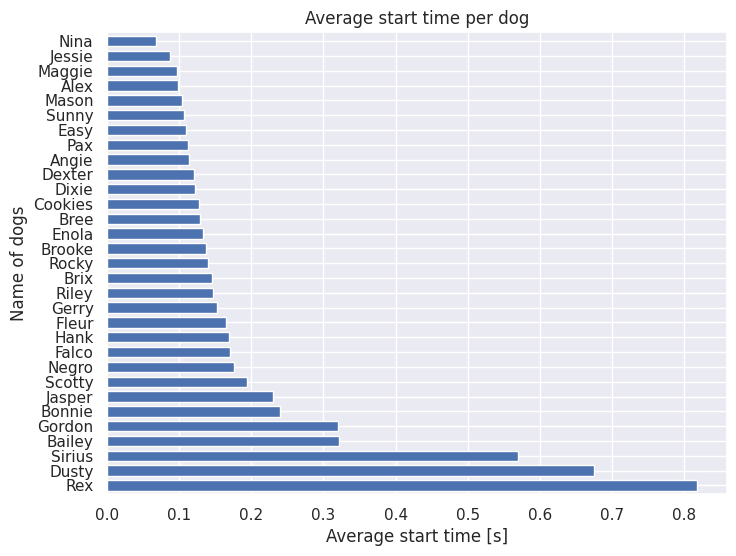

In [24]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
df_dogs[df_dogs.good_start > 0]['avg_start'].sort_values(ascending=False).plot.barh(width=0.7)
plt.xlabel('Average start time [s]')
plt.ylabel('Name of dogs')
plt.title('Average start time per dog')
plt.show()

## Average change time

Indicating dogs with at least one correct change

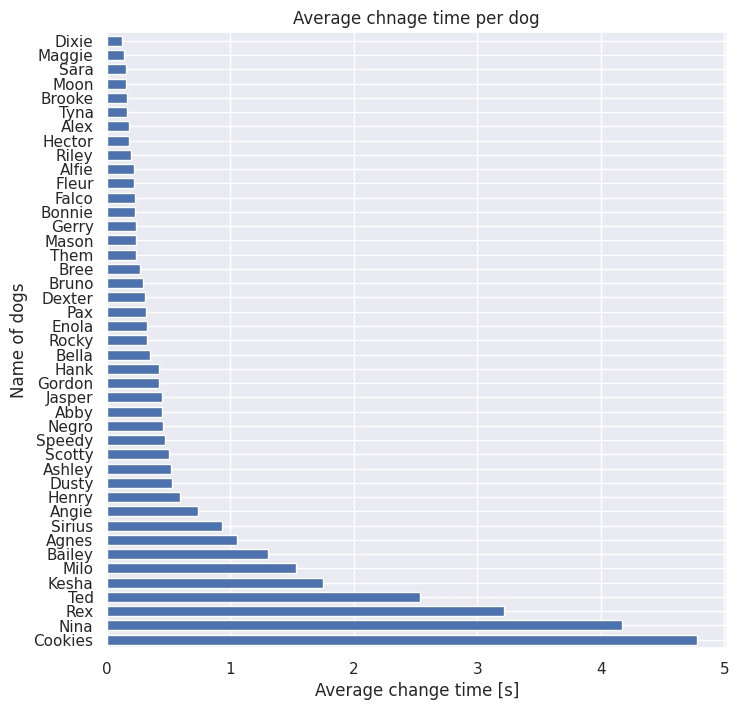

In [25]:
sns.set_theme(rc={"figure.figsize": (8, 8)})
df_dogs[df_dogs.good_change > 0]['avg_change'].sort_values(ascending=False).plot.barh(width=0.7)
plt.xlabel('Average change time [s]')
plt.ylabel('Name of dogs')
plt.title('Average chnage time per dog')
plt.show()